# **Testing pyNamo**

## Settings

In [1]:
inspect.getsource(drawer.setSimplex)

NameError: name 'inspect' is not defined

In [1]:
import time
import random
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import drawer
import parameters as param

import equationsolver as eqsol
import inspect
import importlib

In [2]:
#After making changes to a source file, one must use the "reload" command in order to take into account the changes
importlib.reload(drawer)

<module 'drawer' from '/Users/slimane/Documents/GitHub/pyNamo/drawer.py'>

In [3]:
#Setting LaTeX fonts for plotting in matplotlib

from matplotlib import rc, rcParams
rc('text',usetex=True)
rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       #r'\usepackage{fouriernc}',
       r'\usepackage{times}',
       r'\usepackage{marvosym}',
       #r'\usepackage[defaultsans]{lato}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\renewcommand\familydefault{\sfdefault}',
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
       r'\Large'
]
#rc('font',**{'family':'serif','serif':['fouriernc']})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})


#Setting figure size
#plt.rcParams['figure.figsize'] = [5, (4.8/6.4)*5]
plt.rcParams['figure.dpi'] = 150

%config InlineBackend.figure_format = 'retina'


ValueError: Key text.latex.preamble: Could not convert ['\\usepackage{siunitx}', '\\sisetup{detect-all}', '\\usepackage{times}', '\\usepackage{marvosym}', '\\usepackage{sansmath}', '\\renewcommand\\familydefault{\\sfdefault}', '\\sansmath\\Large'] to str

## 3-strategy symmetric game

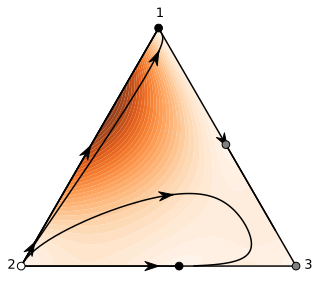

In [98]:
arrowSize= 1/20.0
arrowWidth= (1/3)*arrowSize
#step = 0.01

#pMrps = np.array([[0,0,2],[2,0,5],[-1,2,0]]) #Good Rock-Paper-Scissors game
pMrps = np.array([
    [3.451, 1.627, 0.906],
    [-0.641, 1.273, 2.507],
    [2.694, 2.370, 1.695]
])

fig, ax = plt.subplots()

ax.set_aspect('equal')
plt.axis('off')

plt.plot(clip_on=False)

colorTraj = 'black'

drawer.trajectory([0.9, 0.05], pMrps, param.step, [0.0000001], 50, fig, ax, colorTraj, arrowSize, arrowWidth, 53)
drawer.trajectory([0.5, 0], pMrps, param.step, [0.00001], 10, fig, ax, colorTraj, arrowSize, arrowWidth, 53)
drawer.trajectory([0.1, 0.9], pMrps, param.step, [0.0001], 10, fig, ax, colorTraj, arrowSize, arrowWidth, 53)
drawer.trajectory([0,0.5], pMrps, param.step, [0.0001], 10, fig, ax, colorTraj, arrowSize, arrowWidth, 53)
drawer.trajectory([0.5, 0.5], pMrps, param.step, [0.0001], 10, fig, ax, colorTraj, arrowSize, arrowWidth, 53)
drawer.trajectory([0.3, 0.3], pMrps, param.step, [0.0001], 10, fig, ax, colorTraj, arrowSize, arrowWidth, 53)
drawer.speed_plot([0, 1], [0, np.sqrt(3/4)], 50, pMrps, ax, cm.Oranges, levels = 30, zd=52)
drawer.setSimplex(['$1$','$2$','$3$'], pMrps, ax, 13, 59)
# ax.set_xlim(-0.05, 1.05)
# ax.set_ylim(-0.05, np.sqrt(3)/2 + 0.05)
# ax.set_aspect('equal', adjustable='box')


eqs = drawer.equilibria(pMrps, ax, 'black', 'gray', 'white', 60, 62)

plt.savefig("testSimplex.pdf")

## 2-player 2-action asymmetric game

In [64]:
%config InlineBackend.figure_format = 'svg'  # once per notebook

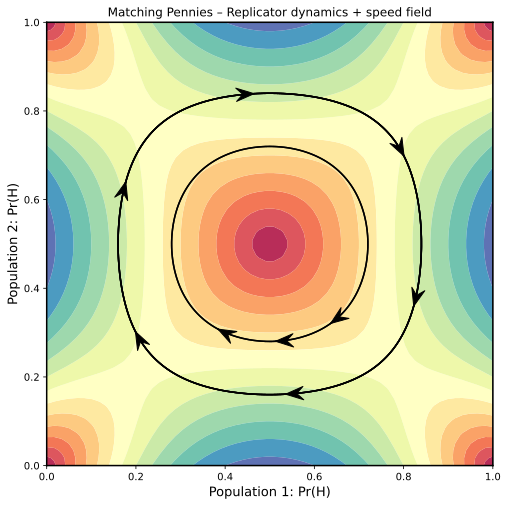

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import game
import drawer
import equationsolver

equationsolver = importlib.reload(equationsolver)
game = importlib.reload(game)
drawer = importlib.reload(drawer)

matching_pennies = game.Game(
    "Matching Pennies",
    (
        np.array([[1, -1], [-1, 1]]),
        np.array([[-1, 1], [1, -1]]),
    ),
    symmetric=False,
)

fig, ax = plt.subplots(figsize=(8, 8))
drawer.setSimplex(['$H$', '$T$'], matching_pennies.payoff_data, ax, 13, 30)

drawer.speed_plot(
    x_region=[0, 1],
    y_region=[0, 1],
    step=60,                       # grid density
    payMtx=matching_pennies.payoff_data,
    ax=ax,
    cmap=plt.cm.Spectral,
    levels=12,
    zd=10,
)

for start in ([0.2, 0.7], [0.8, 0.3], [0.3, 0.4]):
    drawer.trajectory(
        start,
        matching_pennies.payoff_data,
        step=0.02,
        parr=[0.3, 0.6, 0.9],
        Tmax=20,
        fig=fig,
        ax=ax,
        col='k',
        arrSize=0.04,
        arrWidth=0.015,
        zd=20,
    )

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('Population 1: Pr(H)')
ax.set_ylabel('Population 2: Pr(H)')
ax.set_title('Matching Pennies – Replicator dynamics + speed field')
plt.show()


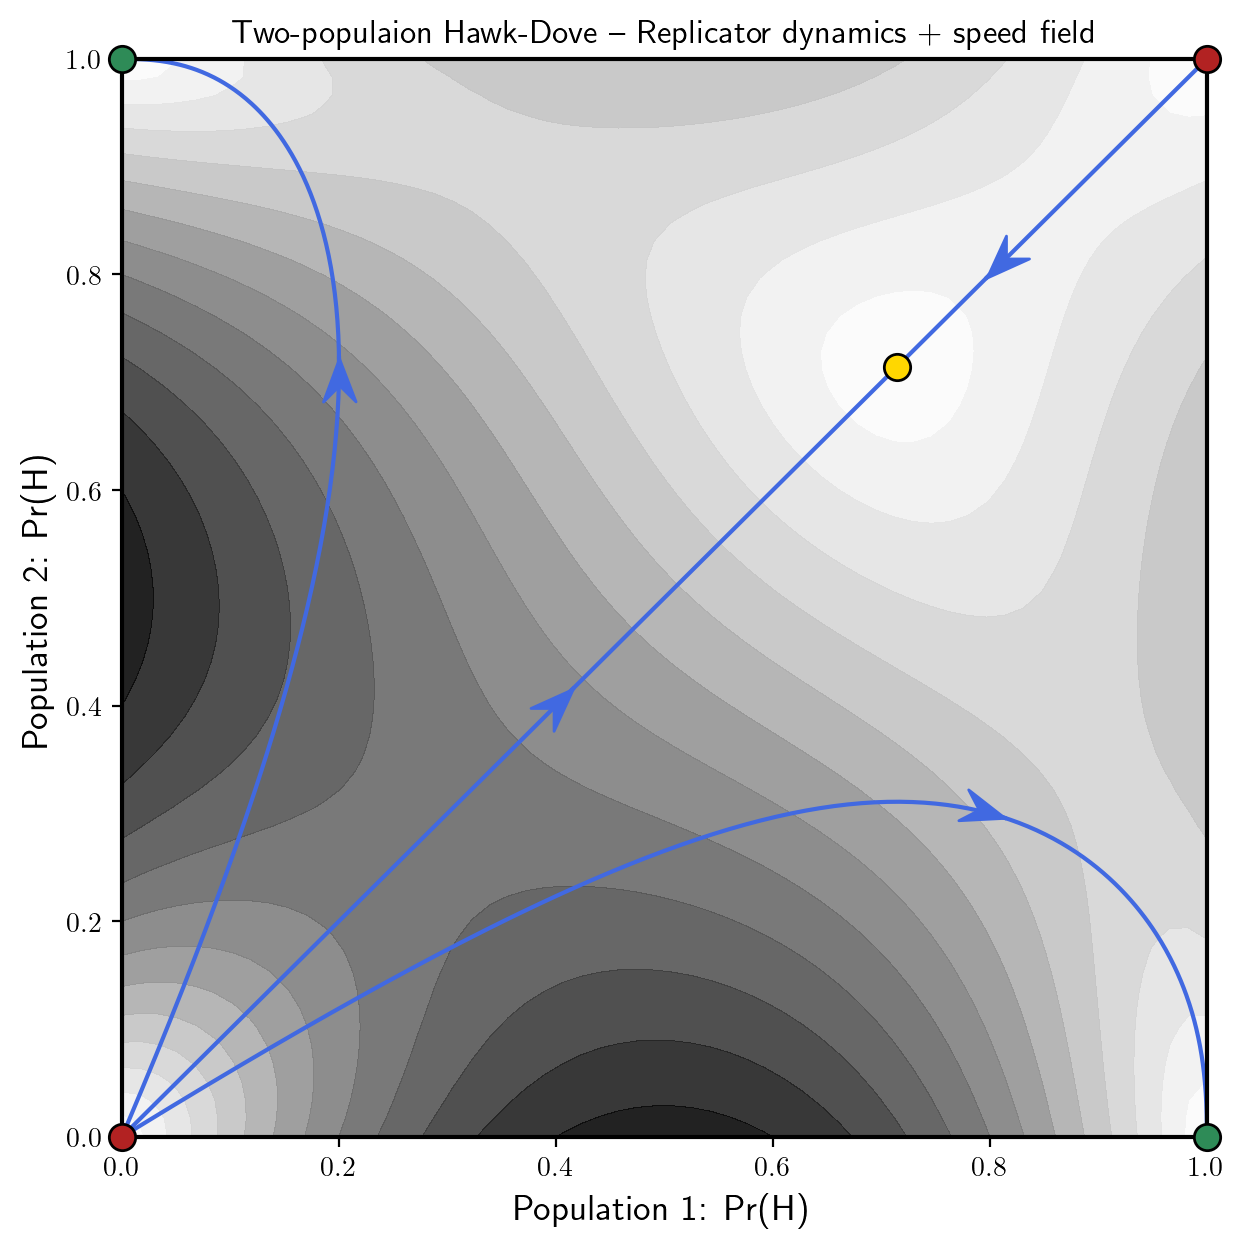

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import game
import drawer
import equationsolver

equationsolver = importlib.reload(equationsolver)
game = importlib.reload(game)
drawer = importlib.reload(drawer)

two_pop_hawk_dove = game.Game(
    "2-pop Hawk-Dove",
    (
        np.array([[-1, 5], [0, 2.5]]),
        np.array([[-1, 5], [0, 2.5]]),
    ),
    symmetric=False,
)

fig, ax = plt.subplots(figsize=(7, 7))
drawer.setSimplex(['$H$', '$T$'], two_pop_hawk_dove.payoff_data, ax, 13, 30)

drawer.speed_plot(
    x_region=[0, 1],
    y_region=[0, 1],
    step=60,                       # grid density
    payMtx=two_pop_hawk_dove.payoff_data,
    ax=ax,
    cmap=plt.cm.Greys,
    levels=12,
    zd=10,
)
drawer.equilibria(
    two_pop_hawk_dove.payoff_data,
    ax,
    colSnk='seagreen',
    colSdl='gold',
    colSce='firebrick',
    ptSize=90,
    zd=40,
)

for start in ([0.2, 0.7], [0.8, 0.3], [0.4, 0.4], [0.8,0.8]):
    drawer.trajectory(
        start,
        two_pop_hawk_dove.payoff_data,
        step=0.02,
        parr=[0.0001],
        Tmax=500,
        fig=fig,
        ax=ax,
        col='royalblue',
        arrSize=0.04,
        arrWidth=0.015,
        zd=20,
    )

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('Population 1: Pr(H)')
ax.set_ylabel('Population 2: Pr(H)')
ax.set_title('Two-populaion Hawk-Dove – Replicator dynamics + speed field')
fig.savefig("testTwoPopHawkDove.pdf", bbox_inches="tight")
plt.show()


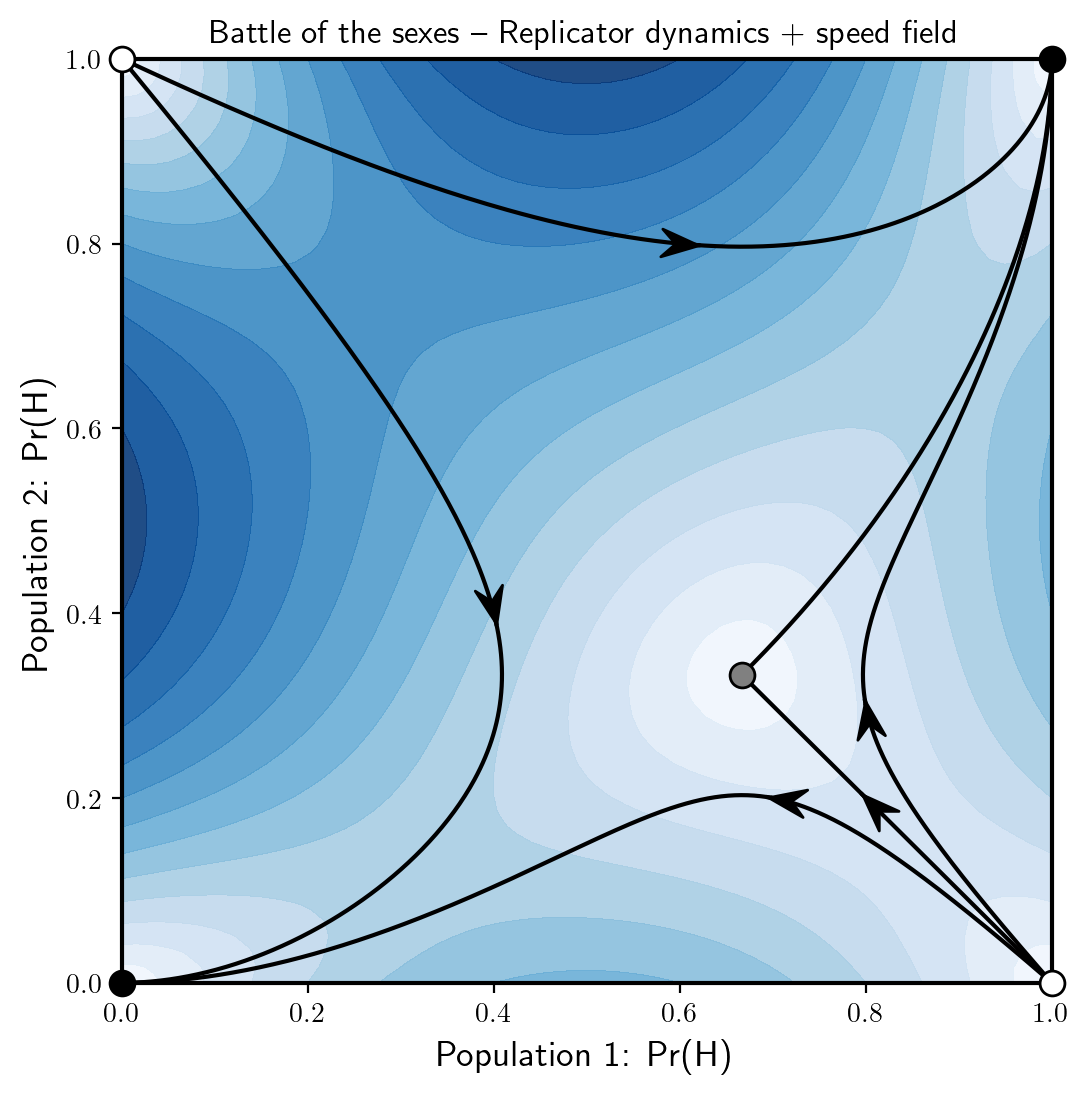

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import game
import drawer
import equationsolver
import matplotlib as mpl

plt.rcdefaults()
plt.style.use('default')


equationsolver = importlib.reload(equationsolver)
game = importlib.reload(game)
drawer = importlib.reload(drawer)

battle_of_the_sexes = game.Game(
    "Battle of the Sexes",
    (
        np.array([[2, 0], [0, 1]]),   # row player payoffs
        np.array([[1, 0], [0, 2]]),   # column player payoffs
    ),
    strategy_labels=["$B$", "$S$"],
    symmetric=False,
)

fig, ax = plt.subplots(figsize=(6, 6))
drawer.setSimplex(['$B$', '$S$'], battle_of_the_sexes.payoff_data, ax, 13, 30)

drawer.speed_plot(
    x_region=[0, 1],
    y_region=[0, 1],
    step=60,                       # grid density
    payMtx=battle_of_the_sexes.payoff_data,
    ax=ax,
    cmap=plt.cm.Blues,
    levels=12,
    zd=10,
)
drawer.equilibria(
    battle_of_the_sexes.payoff_data,
    ax,
    colSnk='black',
    colSdl='gray',
    colSce='white',
    ptSize=80,
    zd=40,
)

for start in ([0.6, 0.8], [0.8, 0.3], [0.4, 0.4], [0.7,0.2], [0.8,0.2]):
    drawer.trajectory(
        start,
        battle_of_the_sexes.payoff_data,
        step=0.02,
        parr=[0.0001],
        Tmax=500,
        fig=fig,
        ax=ax,
        col='k',
        arrSize=0.04,
        arrWidth=0.015,
        zd=20,
    )

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('Population 1: Pr(H)')
ax.set_ylabel('Population 2: Pr(H)')
ax.set_title('Battle of the sexes – Replicator dynamics + speed field')
fig.savefig("testBattleOfTheSexes.pdf", bbox_inches="tight")
plt.show()


The above figure poses a problem because when I display the speed contours, it doesn't show the labels $S$ (*Scissors*) and $P$ (*Paper*).

The replicator dynamics take the form
$$ \dot{x}_i = x_i \left( w_i(x) - \bar{w}(x) \right), \forall i\in A, $$
where $A$ denotes the action set, $x_i\in [0,1]$ is the freqency of strategy $i\in A$, we use a dot to denote the time derivative, $\dot{x}_i = \mathrm{d}x/\mathrm{d}t$, $w_i(x) = \sum_{j\in A} \pi(i,j) x_j$ denotes the expected payoff to strategy $i$ when the population is in state $x \in\Delta A$. We write $\bar{w}(x)$ for the average payoff over all strategies at state $x$.

---

|           | Action 1        | Action 2        |
|-----------|------------------|------------------|
| **Action 1** | $\pi(1,1)$   | $\pi(1,2)$   |
| **Action 2** | $\pi(2,1)$   | $\pi(2,2)$   |

---

|           | Cooperate        | Defect        |
|-----------|------------------|------------------|
| **Cooperate** | $R$   | $S$   |
| **Defefct** | $T$   | $P$   |


In [49]:
import game
importlib.reload(game)

prisoners_dilemma = game.Game("Prisoner's Dilemma", np.array([[3,0],[5,1]]))
prisoners_dilemma.expected_payoffs([[0,1]])

array([0., 1.])

In [31]:
import importlib
import numpy as np

import game
import parameters

game = importlib.reload(game)
parameters = importlib.reload(parameters)

tests = {
    "2P3S": (1, [np.array([1/3, 1/3, 1/3])]),
    "2P4S": (1, [np.array([0.25, 0.25, 0.25, 0.25])]),
    "2P2S": (1, [np.array([0.6, 0.4]), np.array([0.5, 0.5])]),
    "3P2S": (1, [np.array([0.7, 0.3]),
                 np.array([0.4, 0.6]),
                 np.array([0.5, 0.5])]),
}

for test_key, (game_id, profiles) in tests.items():
    g = parameters.GAMES_BY_TEST[test_key][game_id]
    payoffs = g.expected_payoffs(profiles)
    print(f"{test_key} – {g.name}: {payoffs}")


2P3S – Good RPS: [0.33333333 0.33333333 0.33333333]
2P4S – Hofbauer-Swinkels: [-0.25 -0.25 -0.25 -0.25]
2P2S – Matching Pennies: [[ 0.   0. ]
 [-0.2  0.2]]
3P2S – Coordination Cube: [[0.2  0.3 ]
 [0.35 0.15]
 [0.28 0.18]]


## 3-player asymmetric game with 2 actions

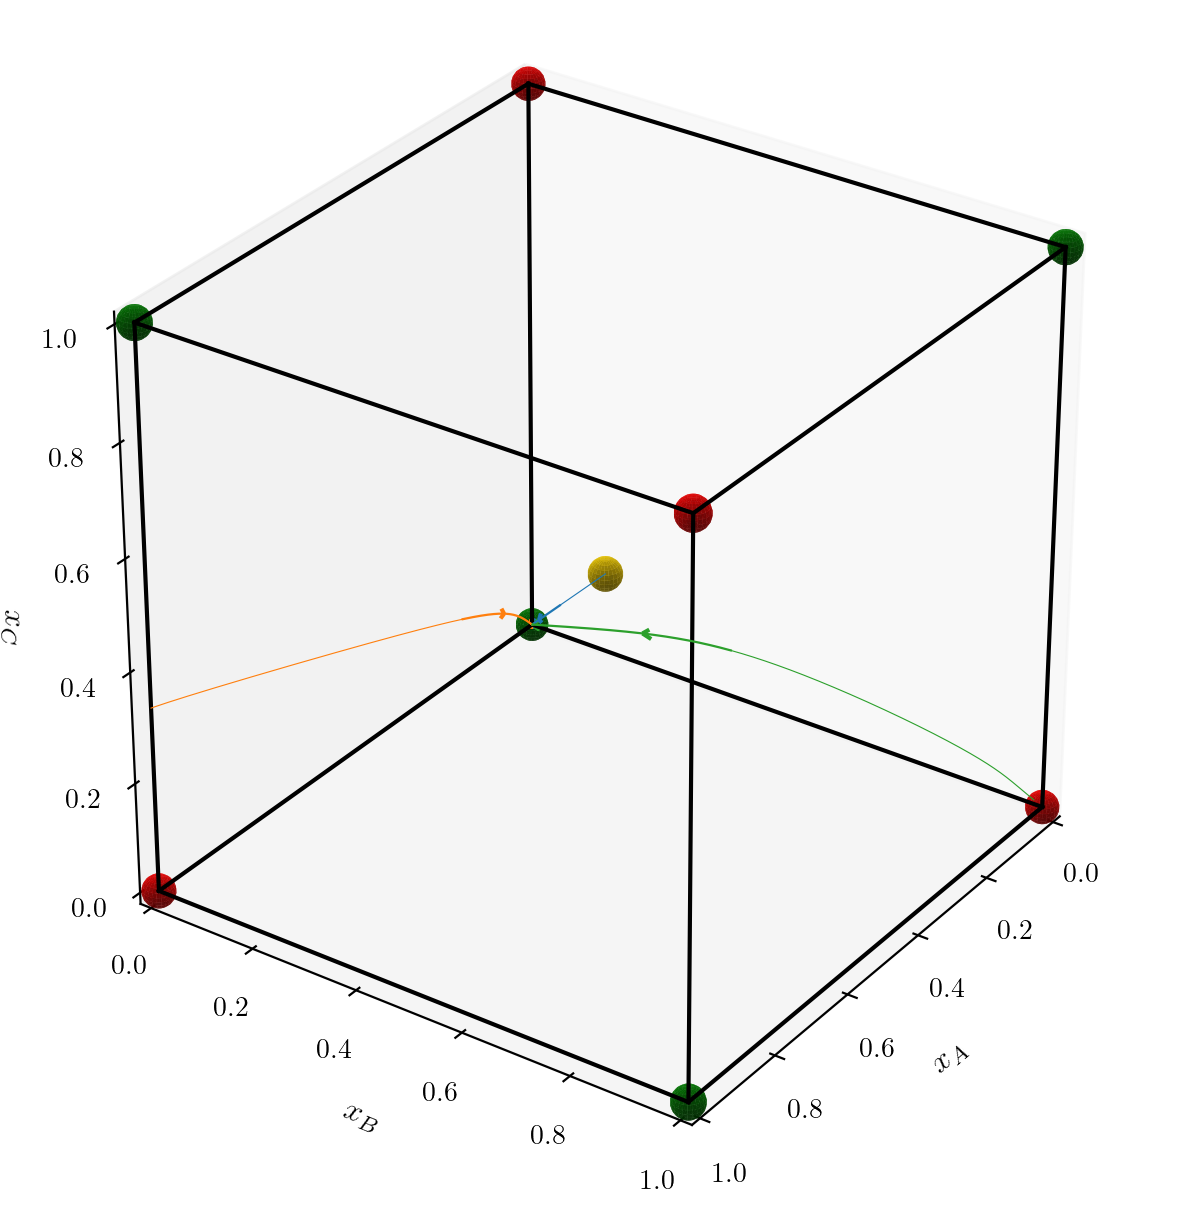

In [131]:
import importlib
import game, dynamics, equationsolver as eqsol, parameters as param, drawer
import matplotlib.pyplot as plt

# make sure the updated code is in memory
importlib.reload(game)
importlib.reload(dynamics)
importlib.reload(eqsol)
param = importlib.reload(param)
drawer = importlib.reload(drawer)

games = param.available_games("3P2S")
coordination_3P = games[1]
payoffs = coordination_3P.payoff_data

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.set_box_aspect((1, 1, 1))
ax.view_init(elev=30, azim=35)

drawer.setSimplex(coordination_3P.strategy_labels, payoffs, ax, fontSize=12, zOrder=30)

starts = [
    ([0.2, 0.2, 0.2], "tab:blue"),
    ([0.6, 0.3, 0.4], "tab:orange"),
    ([0.3, 0.6, 0.3], "tab:green"),
]

for start, color in starts:
    drawer.trajectory(
        start,
        payoffs,
        param.step,
        parr=[0.05, 0.2, 0.4, 0.6, 0.85],
        Tmax=40,
        fig=fig,
        ax=ax,
        col=color,
        arrSize=param.arrowSize * 30,
        arrWidth=param.arrowWidth * 16,
        zd=40,
        arrow_color=color,
    )

drawer.equilibria(payoffs, ax, colSnk='green', colSdl='gold', colSce='red', ptSize=30, zd=45)

plt.tight_layout()
plt.show()

In [100]:
game.payoff_data

(array([[[1., 0.],
         [0., 0.]],
 
        [[0., 0.],
         [0., 1.]]]),
 array([[[1., 0.],
         [0., 0.]],
 
        [[0., 0.],
         [0., 1.]]]),
 array([[[1., 0.],
         [0., 0.]],
 
        [[0., 0.],
         [0., 1.]]]))

In [49]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=[0, 1, 1, 0],  # your trajectory coordinates
    y=[0, 0, 1, 1],
    z=[0, 1, 1, 0],
    mode='lines',
)])
fig.update_layout(scene=dict(xaxis_title='x_A', yaxis_title='x_B', zaxis_title='x_C'))
fig.show()


In [132]:
def majority_with_bias():
    tensors = []
    for player in range(3):
        T = np.zeros((2, 2, 2), dtype=float)
        for a0 in range(2):
            for a1 in range(2):
                for a2 in range(2):
                    profile = [a0, a1, a2]
                    action = profile[player]
                    others = [profile[j] for j in range(3) if j != player]
                    payoff = float(others.count(action))  # base matches

                    if others[0] != others[1]:  # tie between the other two
                        if player == 0 and action == 1:
                            payoff += 0.3
                        elif player == 1 and action == 0:
                            payoff += 0.3
                        elif player == 2 and action == profile[0]:  # follow pop A
                            payoff += 0.3

                    T[a0, a1, a2] = payoff
        tensors.append(T)
    return tuple(tensors)

majority_with_bias()

(array([[[2. , 1. ],
         [1. , 0. ]],
 
        [[0. , 1.3],
         [1.3, 2. ]]]),
 array([[[2. , 1.3],
         [0. , 1. ]],
 
        [[1.3, 0. ],
         [1. , 2. ]]]),
 array([[[2. , 0. ],
         [1.3, 1. ]],
 
        [[1. , 1.3],
         [0. , 2. ]]]))

In [139]:
!pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.8/515.8 kB 6.7 MB/s eta 0:00:00a 0:00:01


In [140]:
%matplotlib widget

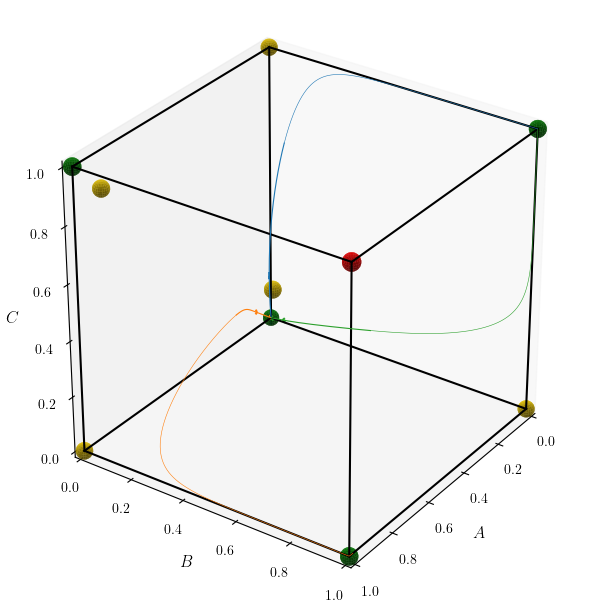

In [141]:
import importlib
import game, dynamics, equationsolver as eqsol, parameters as param, drawer
import matplotlib.pyplot as plt

# make sure the updated code is in memory
importlib.reload(game)
importlib.reload(dynamics)
importlib.reload(eqsol)
param = importlib.reload(param)
drawer = importlib.reload(drawer)

games = param.available_games("3P2S")
majority_and_bias = game.Game(
    "Majority with Bias",
    majority_with_bias(),
    strategy_labels=["$A$", "$B$", "$C$"],
    symmetric=False,
)
payoffs = majority_and_bias.payoff_data

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.set_box_aspect((1, 1, 1))
ax.view_init(elev=30, azim=35)

drawer.setSimplex(majority_and_bias.strategy_labels, payoffs, ax, fontSize=12, zOrder=30)

starts = [
    ([0.2, 0.2, 0.8], "tab:blue"),
    ([0.6, 0.3, 0.4], "tab:orange"),
    ([0.3, 0.6, 0.3], "tab:green"),
]

for start, color in starts:
    drawer.trajectory(
        start,
        payoffs,
        param.step,
        parr=[0.05, 0.2, 0.4, 0.6, 0.85],
        Tmax=40,
        fig=fig,
        ax=ax,
        col=color,
        arrSize=param.arrowSize * 30,
        arrWidth=param.arrowWidth * 16,
        zd=40,
        arrow_color=color,
    )

drawer.equilibria(payoffs, ax, colSnk='green', colSdl='gold', colSce='red', ptSize=30, zd=45)

plt.tight_layout()
plt.show()

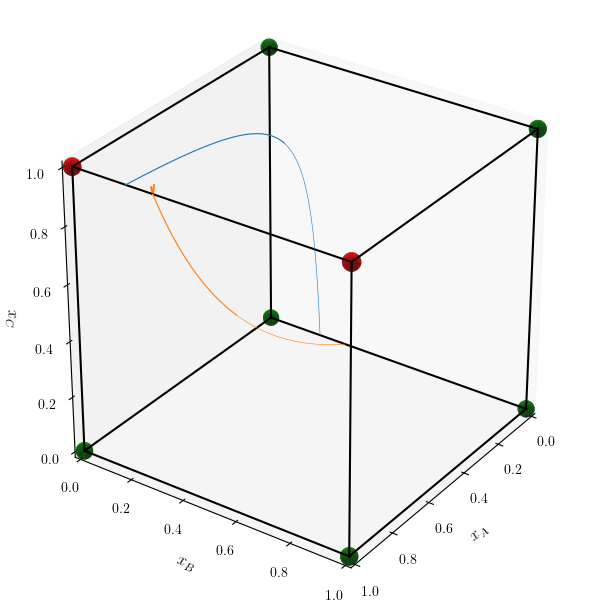

In [145]:
import importlib
import game, dynamics, equationsolver as eqsol, parameters as param, drawer
import matplotlib.pyplot as plt

# make sure the updated code is in memory
importlib.reload(game)
importlib.reload(dynamics)
importlib.reload(eqsol)
param = importlib.reload(param)
drawer = importlib.reload(drawer)

games = param.available_games("3P2S")
mismatching_pennies = game.Game(
    "Mismatching Pennies",
    (
        np.array([  # player 0
            [[0, 0],
             [1, 1]],
            [[1, 1],
             [0, 0]],
        ]),
        np.array([  # player 1
            [[0, 1],
             [0, 1]],
            [[1, 0],
             [1, 0]],
        ]),
        np.array([  # player 2
            [[0, 1],
             [1, 0]],
            [[0, 1],
             [1, 0]],
        ]),
    ),
    strategy_labels=["$x_A$", "$x_B$", "$x_C$"],
    symmetric=False,
)
payoffs = mismatching_pennies.payoff_data

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.set_box_aspect((1, 1, 1))
ax.view_init(elev=30, azim=35)

drawer.setSimplex(mismatching_pennies.strategy_labels, payoffs, ax, fontSize=12, zOrder=30)

starts = [
    ([0.2, 0.2, 0.8], "tab:blue"),
    ([0.6, 0.3, 0.4], "tab:orange"),
    ([0.5, 0.5, 0.5], "tab:green"),
]

for start, color in starts:
    drawer.trajectory(
        start,
        payoffs,
        param.step,
        parr=[0.05, 0.2, 0.4, 0.6, 0.85],
        Tmax=4000,
        fig=fig,
        ax=ax,
        col=color,
        arrSize=param.arrowSize * 30,
        arrWidth=param.arrowWidth * 16,
        zd=40,
        arrow_color=color,
    )

drawer.equilibria(payoffs, ax, colSnk='green', colSdl='gold', colSce='red', ptSize=30, zd=45)

plt.tight_layout()
plt.show()